K-Nearest Neighbors

In [4]:
print("test")

test


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline


In [13]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Data Visualization and Analysis

In [17]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

281 plus services,
266 basic services,
236 total service,
and 217 E service customers

array([[<Axes: title={'center': 'income'}>]], dtype=object)

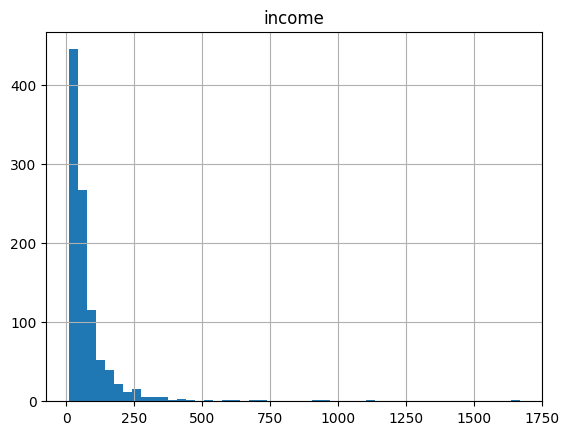

In [20]:
df.hist(column='income',bins=50)

Feature set

In [21]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [23]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values 
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [24]:
y= df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

Normalize Data

In [30]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state= 4)
print ('train set:', x_train.shape, y_train.shape)
print ('test set:', x_test.shape, y_test.shape)

train set: (800, 11) (800,)
test set: (200, 11) (200,)


Classification

In [33]:
from sklearn.neighbors import KNeighborsClassifier

training 

In [35]:
k = 4
neigh=KNeighborsClassifier(n_neighbors =k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

Predicting

In [36]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

Accuracy evaluation

In [37]:
from sklearn import metrics
print("Train set Accuracy:",metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("test set accuracy:", metrics.accuracy_score(y_test,yhat))

Train set Accuracy: 0.5475
test set accuracy: 0.32


## Practice


build model again, but with k=6

In [39]:
k = 6
neigh=KNeighborsClassifier(n_neighbors =k).fit(x_train,y_train)
yhat = neigh.predict(x_test)
print("Train set Accuracy:",metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("test set accuracy:", metrics.accuracy_score(y_test,yhat))

Train set Accuracy: 0.51625
test set accuracy: 0.31


What about other K?

we can calculate the accuracy of KNN for different values of k

In [40]:
Ks= 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range (1,Ks):
    neigh=KNeighborsClassifier(n_neighbors =n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

plot the model accuracy for a different bumber of neighbors.

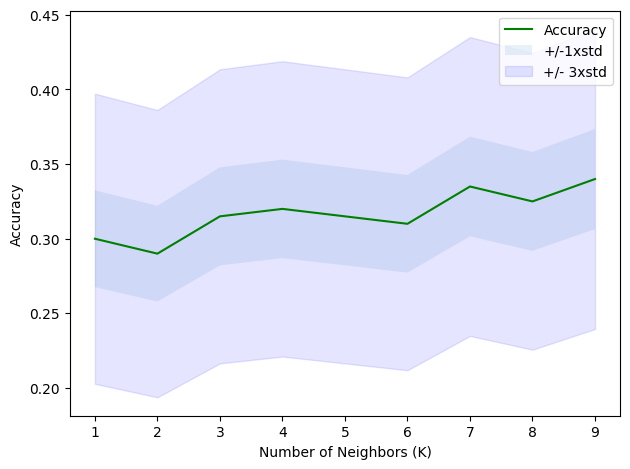

In [45]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc -1 * std_acc,mean_acc +1*std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy','+/-1xstd','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [46]:
print("the best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

the best accuracy was with 0.34 with k= 9
